In [1]:
# lib import
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# data fetch
re = pd.read_csv('Real estate.csv')

In [3]:
re.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
re.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


<p>Plik "Real estate.csv" zawiera informacje o transakcjach nieruchomościami w liczbie 414 w latach 2012-2013 z wyszczególnieniem kolejno ich wieku, dystansu od najbliżeszego punktu komunikacji zbiorowej MRT, liczby okolicznych sklepów spożywczych, szerokości i długości geograficznej, cena za jednostkę powierzchni.</p>
<p>Średnia szerokość i długość geograficzna rejonu wynosi (24.969030, 121.533361) tj. południowa część dystryktu Xindian miasta Taipei, Taiwan. Średnia cena ustalona na podstawie przedstawionych transakcji wynosi 37,980 jednostek pieniężnych na jednostkę powierzchni nieruchomości (ze standardowym odchyleniem 13,606). Przeciętna cena tej populacji (mediana) wynosi 38,450. Mediana wieku nieruchomości wynosi 16,100, odległości do punktu komunikacji zbiorowej - 492, liczba sklepów spożywczych - 4.</p>



## Exploratory data analysis EDA

<AxesSubplot:>

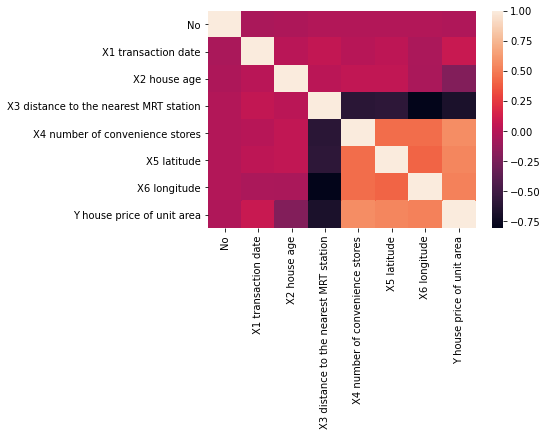

In [5]:
numeric_df = re.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr())

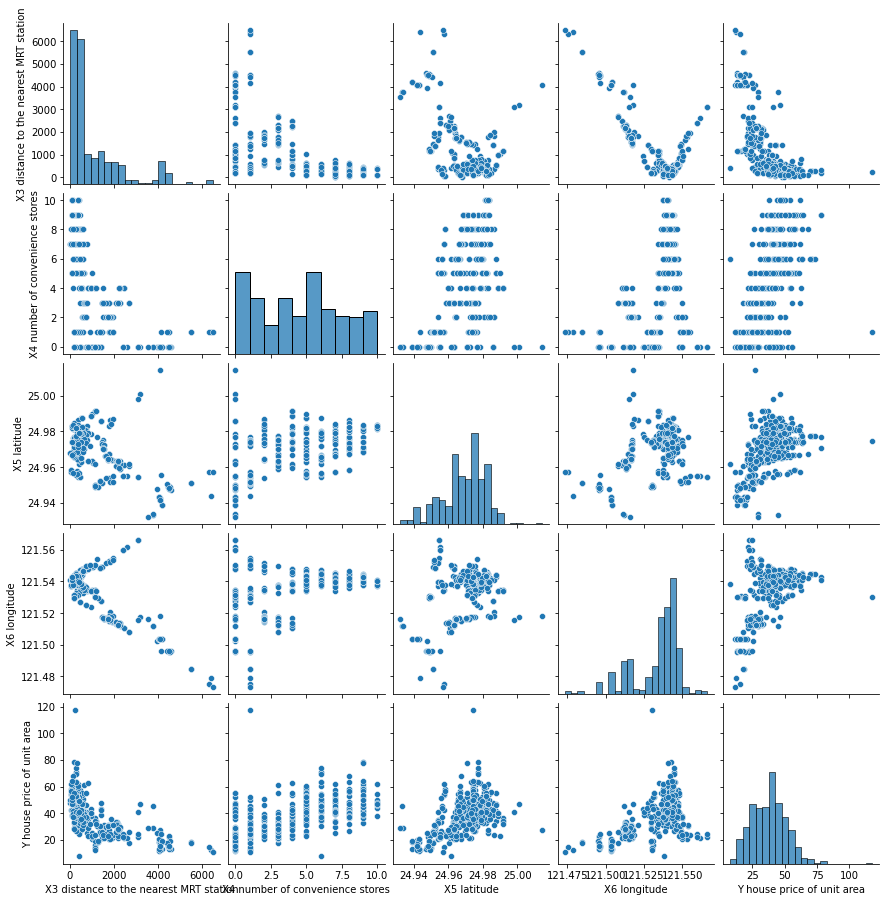

In [6]:
# korelogram z wybranych składników wykazujacych korelacje
# re.columns
c_filter = [
  # 'No', 'X1 transaction date', 'X2 house age',
  'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
  'Y house price of unit area']
sns.pairplot(re[c_filter])


- Znacząca większość nieruchomości jest w dobrej odległości od najbliższego punktu komunikacji zbiorowej.
- Nieruchomości mają w miarę taką samą liczbę dostępnych najbliższych sklepów spożywczych.
- Geolokacyjnie najwięcej transakcji zawarto w środkowej szerokości i górnej długości geograficznej rejonu.
- Histogram cen za jednostkę powierzchni jest dodatnie skośny.

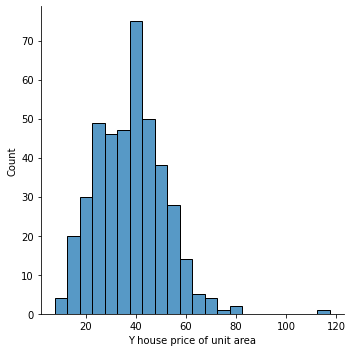

In [7]:
# Histogram dla zmiennej zależnej (opisywanej)
sns.displot(re['Y house price of unit area'])

Dodatnia skośnośc i kurtoza. Ceny względem rozkładu normalnego skupiają się w niższej części.

## Linear regression model training

In [8]:
# zmienne wyjaśniające
X = re[['X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
# zmienna wyjaśniana
Y = re['Y house price of unit area']

In [9]:
# lib importb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
# instrukcja dla matplotlib żeby grafy dobrze grały z jupyterem
%matplotlib inline

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [11]:
print(f'Linear model intercept value is {round(lm.intercept_, 2)}')

Linear model intercept value is -5911.84


Wyraz wolny równania liniowego wynosi -5911,835 jednostek pieniężnych. Znaczy to że statystycznie dla wszystkich składników równych zero, cena wynosi -5911,835

In [12]:
coeff_df = pd.DataFrame(lm.coef_ , X.columns , columns=['Coefficient'])
coeff_df

,Coefficient
X3 distance to the nearest MRT station,-0.004754
X4 number of convenience stores,0.979716
X5 latitude,226.287185
X6 longitude,2.479178


### Interpretacja współczynników cech opisujących
<ul>
<li>Przy innych czynikach niezmienionych, cena za jednostkę powierzchni nieruchomości spada o 0,005 wraz ze wzrostem o jednostkę odległości od najbliższej komunikacji</li>
<li>Przy innych czynikach niezmienionych, cena za jednostkę powierzchni nieruchomości rośnie o 0,980 wraz ze wzrostem o jedną jednostkę liczby okolicznych sklepów spożywczych</li>
<li>Przy innych czynikach niezmienionych, cena za jednostkę powierzchni nieruchomości rośnie o 226,287 wraz ze wzrostem o jedną jednostkę szerokości geograficznej (względem rejonu obserwacji)</li>
<li>Przy innych czynikach niezmienionych, cena za jednostkę powierzchni nieruchomości rośnie o 2,479 wraz ze wzrostem o jedną jednostkę długości geograficznej</li>
</ul>

## Predykcje

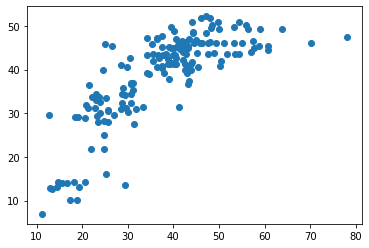

In [13]:
predicts = lm.predict(X_test)
plt.scatter(y_test, predicts)

Skrzyżowanie na wykresie punktowym wartości oczekiwanych i wartości testowych mniej więcej przypomina linię nachuloną do osi OX pod kątem 45 stopni.

c:\Users\brtk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Y house price of unit area', ylabel='Density'>

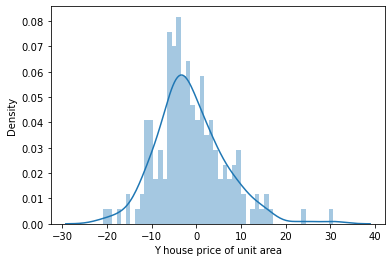

In [14]:
# historgram dla wartości pozostałych
sns.distplot((y_test-predicts),bins=50)

Rozkład różnic przewidwań przypomina rozkład normalny.

In [15]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, predicts)
mse = metrics.mean_squared_error(y_test, predicts)
rmse = mse**(1/2)
mae = round(mae, 3)
mse = round(mse, 3)
rmse = round(rmse, 3)
print('MAE:\t', mae,
      '\nMSE:\t', mse,
      '\nRMSE:\t', rmse
)

MAE:	 6.051 
MSE:	 60.202 
RMSE:	 7.759


RMSE, średni błąd (różnica) między wartością oczekiwaną a rzeczywistą wyrażony w jednostkach zmiennej zależnej, jest na względnie niskim poziomie.
Model jest dobrym dopasowaniem.

## Ordinary least squares OLS

In [16]:
# pip install statsmodels
import statsmodels.api as sm
 
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                                     OLS Regression Results                                    
Dep. Variable:     Y house price of unit area   R-squared (uncentered):                   0.936
Model:                                    OLS   Adj. R-squared (uncentered):              0.935
Method:                         Least Squares   F-statistic:                              888.5
Date:                        Sat, 02 Dec 2023   Prob (F-statistic):                   4.13e-144
Time:                                13:32:28   Log-Likelihood:                         -932.63
No. Observations:                         248   AIC:                                      1873.
Df Residuals:                             244   BIC:                                      1887.
Df Model:                                   4                                                  
Covariance Type:                    nonrobust                                                  
                                        

- P-value jest niskie dla wszystkich czterech zmiennych objaśniających, tzn że są one istotne statystycznie (&lt .05)
- Współczynnik determinancji R<sup>2</sup> będący miarą jakości dopasowania modelu do danych uczących jest bardzo wysoki. Wartości z zakresu [0;1]
- Wartość testu Durbina-Watson'a, z zakresu [0;4], wskazuje, że nie ma dowodów autokorelacji. Hipoteza zerowa nie może być odrzucona.
- Test JB świadczy o jakości dopasowania modelu do zbioru próbki która przypomina kurtozą i skośnością rozkład normalny.